In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [53]:
from google.colab import drive #comment out this line if you are using Colab
drive.mount("/content/gdrive/") 

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [54]:
# importing the csv into DataFrame using Pandas
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Intro to DS//Group_19_data_cleaned.csv",encoding= 'unicode_escape',parse_dates=[0])
df.head(2)

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1
1,1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1


In [55]:
df = df.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [56]:
df = df.drop("Unnamed: 0",axis=1)

In [57]:
df.Date = pd.to_datetime(df.Date, format="%Y/%m/%d")

In [58]:
df.insert(1,"Day", df.Date.dt.day)
df.insert(2, "Month", df.Date.dt.month)
df.insert(3, "Year", df.Date.dt.year)

In [59]:
df.columns = [i.split("(")[0].strip().title().replace(" ","_") for i in [*df.columns]]

In [60]:
df.insert(3, 'WeekDay',df["Date"].dt.day_name())

In [61]:
df.Year = df.Year.map({2017:0, 2018:1})

In [62]:
df.Seasons = df.Seasons.map({"Winter":1, 'Autumn':2, 'Spring':3, 'Summer':4})

In [63]:
df.insert(2, 'label_day_night', df['Hour'].apply(lambda x : 0 if (x<7) else( 1)))

In [64]:
df


,Date,Day,label_day_night,Month,WeekDay,Year,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-01-12,12,0,1,Thursday,0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,1
1,2017-01-12,12,0,1,Thursday,0,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,1
2,2017-01-12,12,0,1,Thursday,0,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1
3,2017-01-12,12,0,1,Thursday,0,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,1
4,2017-01-12,12,0,1,Thursday,0,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,30,1,11,Friday,1,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,2,0,1
8756,2018-11-30,30,1,11,Friday,1,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,2,0,1
8757,2018-11-30,30,1,11,Friday,1,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,2,0,1
8758,2018-11-30,30,1,11,Friday,1,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,2,0,1


In [65]:
df["Working_Day"] = 1
df.loc[(df.WeekDay=="Saturday")|(df.WeekDay=="Sunday"), "Working_Day"] = 0

In [66]:
df.Humidity[df.Humidity==0] = df.Humidity.mean()

<ipython-input-66-64e5ed02f960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Humidity[df.Humidity==0] = df.Humidity.mean()


In [67]:
categoryVariableList = ["WeekDay"]
for var in categoryVariableList:
    df[var] = df[var].astype("category")

In [68]:
for col in categoryVariableList:
    df_dummies_col = pd.get_dummies(df[col])
    
    df = pd.concat([df, df_dummies_col],axis=1)
    
    df.drop(col, axis=1, inplace=True)

In [69]:
df.columns

Index(['Date', 'Day', 'label_day_night', 'Month', 'Year', 'Rented_Bike_Count',
       'Hour', 'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
       'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'Working_Day', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [70]:
columns = df.columns.tolist()
columns.append(columns.pop(5))
df = df[columns]

In [71]:
df.drop("Date",axis=1, inplace=True)

In [83]:
df.head(3)

,Day,label_day_night,Month,Year,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,...,Functioning_Day,Working_Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Rented_Bike_Count
0,12,0,1,0,0,-5.2,37.0,2.2,2000,-17.6,...,1,1,0,0,0,0,1,0,0,254
1,12,0,1,0,1,-5.5,38.0,0.8,2000,-17.6,...,1,1,0,0,0,0,1,0,0,204
2,12,0,1,0,2,-6.0,39.0,1.0,2000,-17.7,...,1,1,0,0,0,0,1,0,0,173


1. Cluster Centroids: The cluster centroid is the most representative point of a specific cluster. So, if we decide to find three clusters, we will have three cluster centroid.
2. Euclidean Distance: Is the distance between two data points and this term is essential when gathering the distance between the cluster centroids and the data points.
3. Elbow Method: The elbow method is a technique used to choose the most optimal number of clusters. Remember, in Kmeans clustering we add the number of clusters in a manual way, so the elbow method is useful when using Kmeans. Why is it called the Elbow method? Because as more iterations run to find the optimal number of clusters, the line will take the shape of the arm and the optimal number of clusters is the point that is in the elbow part of the arm.

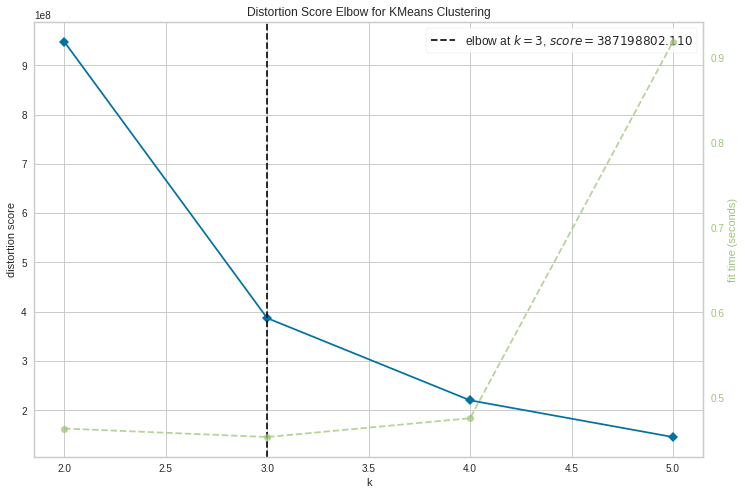

In [73]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

# X = df.drop(['Rented_Bike_Count'],axis=1)
X = df[['Temperature','Rented_Bike_Count']]

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof() 

In [74]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)

KMeans(n_clusters=3)

In [75]:
# Printing the Centroids
print(kmeans.cluster_centers_)

[[   6.77373822  232.65570681]
 [  19.06316368  959.07799341]
 [  22.68604466 1904.00318979]]


In [76]:
print(kmeans.labels_)

[0 0 0 ... 1 1 0]


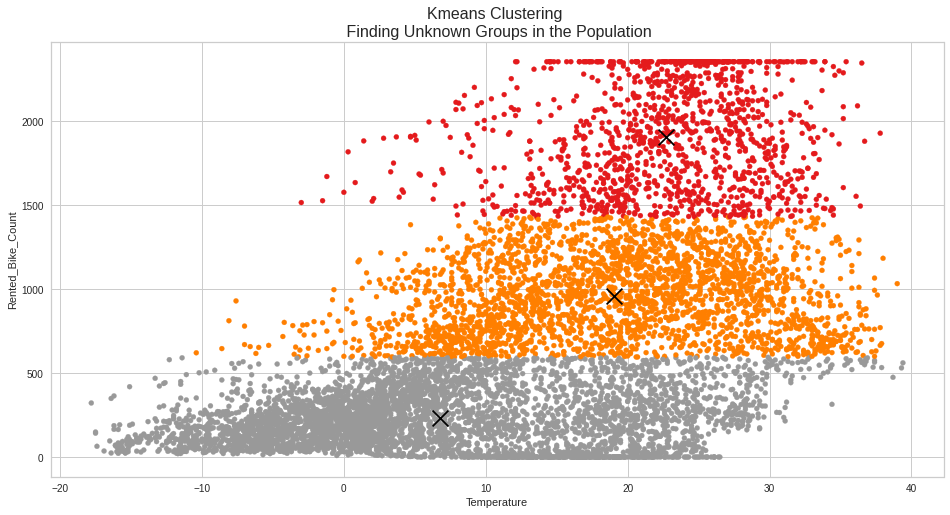

In [89]:
fig = plt.figure(figsize=(16,8))
# Set1_r
plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.ylabel('Rented Bike Count') , plt.xlabel('Temperature')
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()
